In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
df.info()

df.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

**comentarios:**
No hay valores faltantes en ninguna de las 14 columnas, por lo que no es necesario imputar ni descartar registros.

## EDA

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Perfil general de la clientela**

Edad promedio: ~29 años (rango 18–41).

Duración media como cliente: ~3.7 meses (máximo ~31 meses).

Contrato medio: ~4.7 meses.

Frecuencia media de visitas: 1.88 veces/semana histórica, 1.77 veces/semana en el último mes.

Gasto adicional promedio: ~147

In [5]:
print("Medias por estado de Churn:\n", df.groupby('Churn').mean(), "\n")

Medias por estado de Churn:
          gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0     

**Diferencias entre quienes se quedan y quienes se van:**

Edad: los que cancelan son más jóvenes (27 años vs. 30).

Antigüedad: llevan menos tiempo con el gym (1 mes vs. 4.7 meses).

Contrato: suelen tener plazos mucho más cortos (1.7 meses vs. 5.7).

Frecuencia: asisten menos, tanto históricamente (1.47 vs. 2.02) como en el último mes (1.04 vs. 2.03).

Gasto en extras:  (115 vs. 158).

Participación social: menos propensos a clases grupales (27 % vs. 46) y a promociones “trae a un amigo” (18 % vs. 35).

Vínculo local/empresas: menor proporción vive o trabaja cerca (77 % vs. 87) y menos trabajan en empresas asociadas (36 % vs. 53).

In [6]:
features = [
    'Age',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total'
]

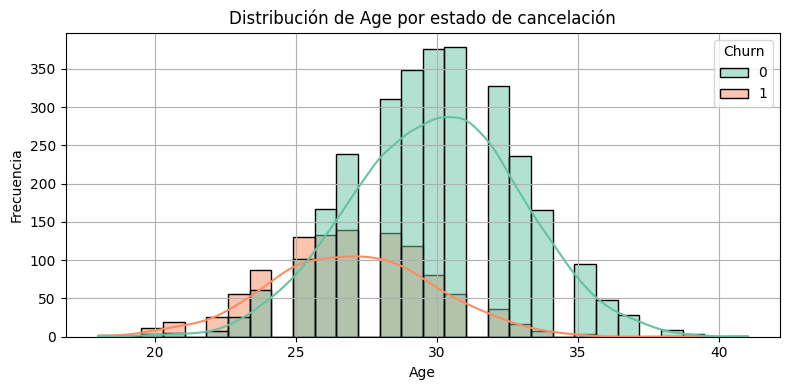

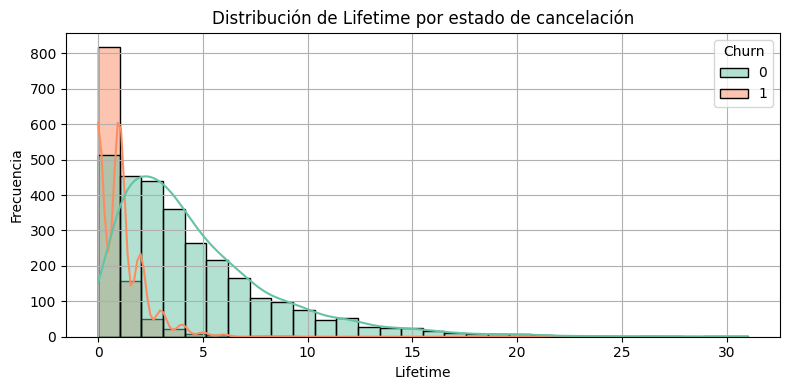

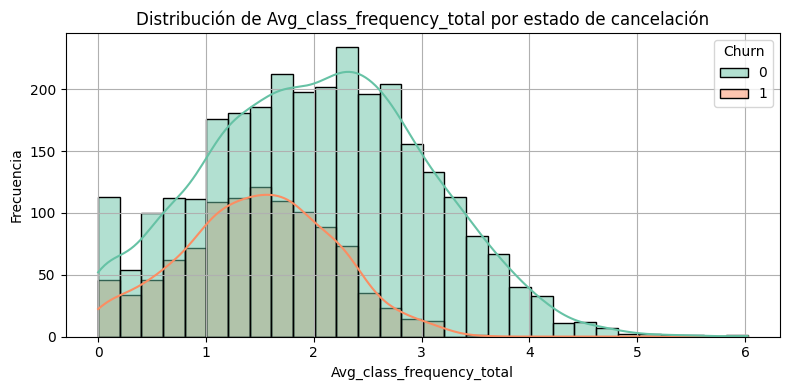

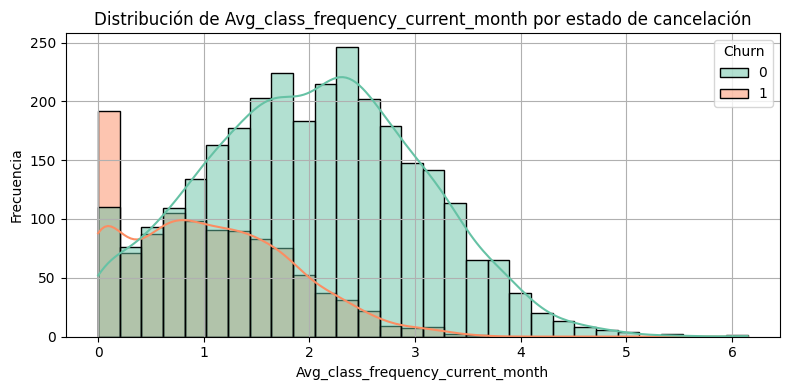

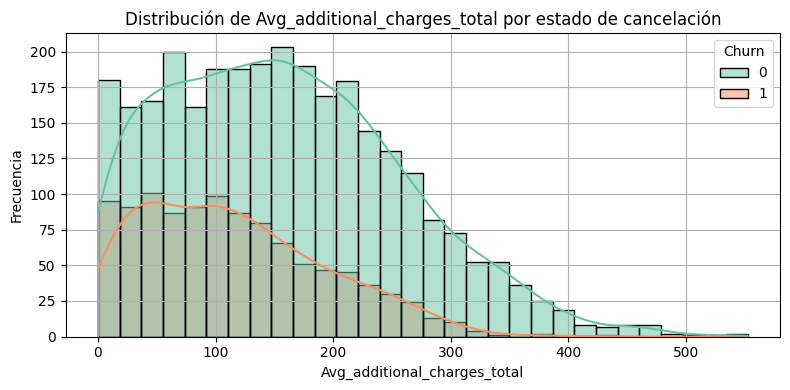

In [7]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=df,
        x=feature,
        hue='Churn',
        kde=True,
        palette='Set2',
        bins=30
    )
    plt.title(f'Distribución de {feature} por estado de cancelación')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Patrones en las distribuciones**

Las distribuciones superpuestas de edad, antigüedad, frecuencia y gasto muestran desviaciones claras: la cola de clientes que se van se concentra en valores bajos de antigüedad y frecuencia.

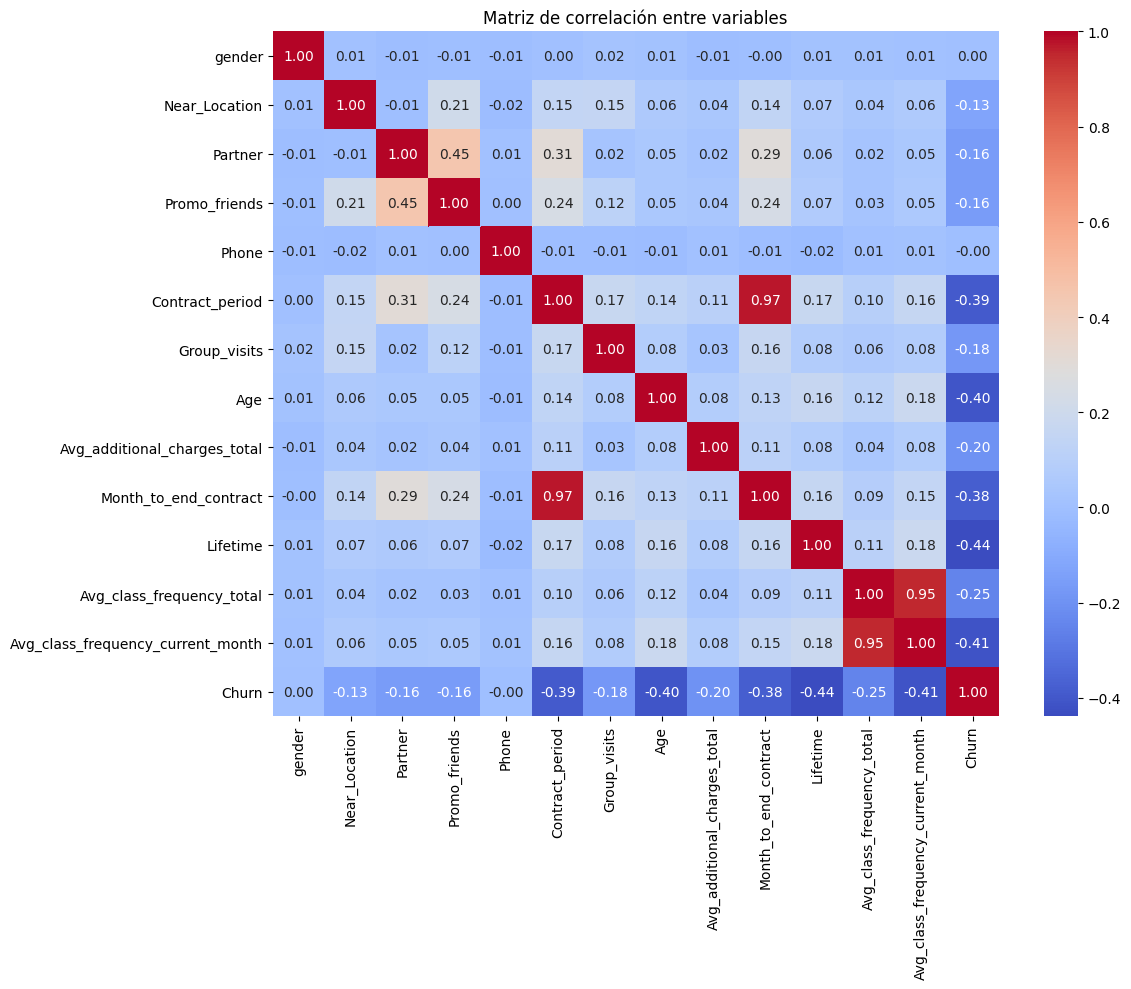

In [8]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables")
plt.tight_layout()
plt.show()

**Correlaciones más relevantes**

Negativas fuertes con churn:

Lifetime (–0.44)

Contract_period (–0.39)

Avg_class_frequency_current_month (–0.41)

age (–0.40)

También hay correlaciones negativas moderadas con Promo_friends y Partner.

**Conclusion:**
los clientes con mayor antigüedad, contratos más largos, alta frecuencia de visitas y mayor gasto en servicios adicionales tienen mucho menor probabilidad de cancelar. Aquellos menores de ~28 años, con contratos mensuales, baja asistencia y poco o ningún gasto extra son el segmento con más riesgo de churn.

## Construir un modelo para predecir la cancelación de usuarios

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [10]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
for name, y_pred in [("Regresión Logística", y_pred_lr), ("Bosque Aleatorio", y_pred_rf)]:
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall:    {rec:.3f}\n")

Regresión Logística:
  Accuracy:  0.916
  Precision: 0.873
  Recall:    0.782

Bosque Aleatorio:
  Accuracy:  0.910
  Precision: 0.849
  Recall:    0.782



**Conclusión:**
La regresión logística ha obtenido una precisión ligeramente superior (0.873 vs. 0.849) y la misma recall (0.782) que el bosque aleatorio, además de un accuracy marginalmente mayor. Por tanto, para este caso concreto el modelo de regresión logística ofrece un mejor equilibrio entre precisión y capacidad de detección de churn. 

## Crear clústeres de usuarios/as

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X = df.drop("Churn", axis=1)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

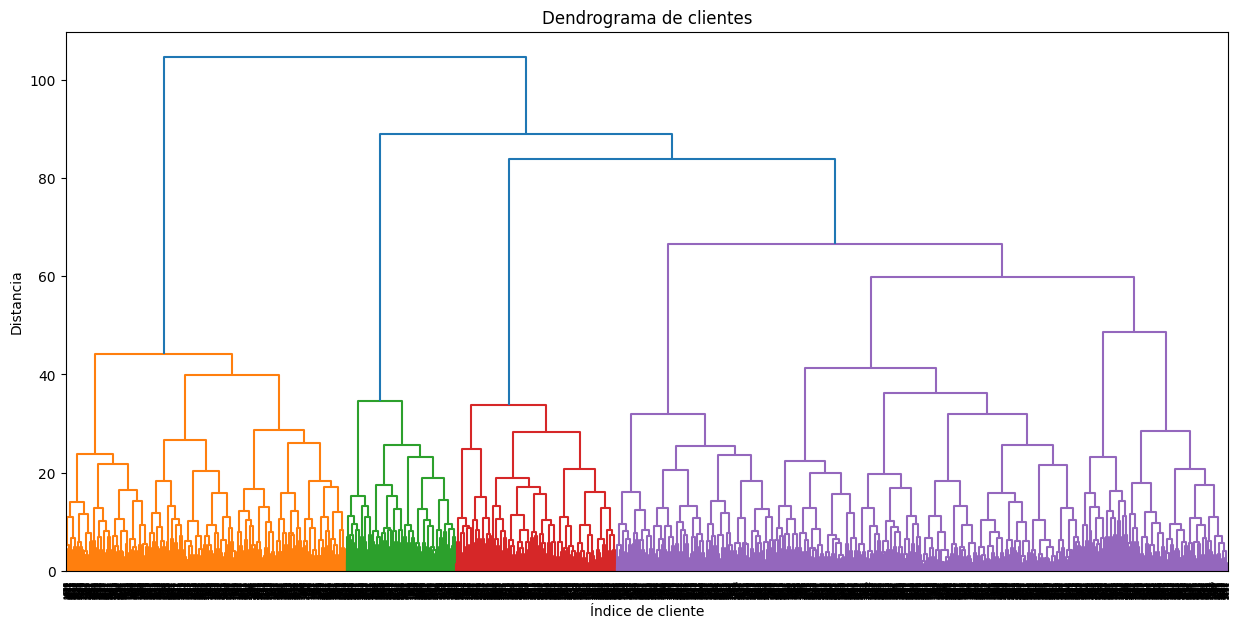

In [19]:
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title("Dendrograma de clientes")
plt.xlabel("Índice de cliente")
plt.ylabel("Distancia")
plt.show()

**Conclusiones del dendrograma**

Corte óptimo en 5 clústeres: al inspeccionar las alturas de fusión en el dendrograma, vemos saltos grandes alrededor de distancias 30 y 80. Un corte intermedio captura cinco grupos bien diferenciados, con cada clúster internamente homogéneo y bien separado de los demás.

Estructura jerárquica: hay dos “ramas” principales que se unen a gran distancia, indicando dos macro-segmentos (clientes de baja vs. alta fidelidad), luego cada rama se subdivide en tres o cuatro subgrupos con diferencias en antigüedad, frecuencia y tipo de contrato.

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [21]:
print("Medias de características por clúster:")
print(df.groupby("cluster").mean(), "\n")

Medias de características por clúster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                               

In [22]:
features = [
    "Age",
    "Lifetime",
    "Avg_class_frequency_total",
    "Avg_class_frequency_current_month",
    "Avg_additional_charges_total"
]

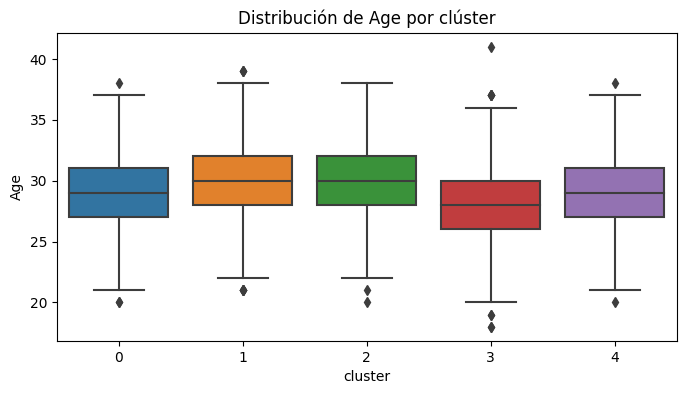

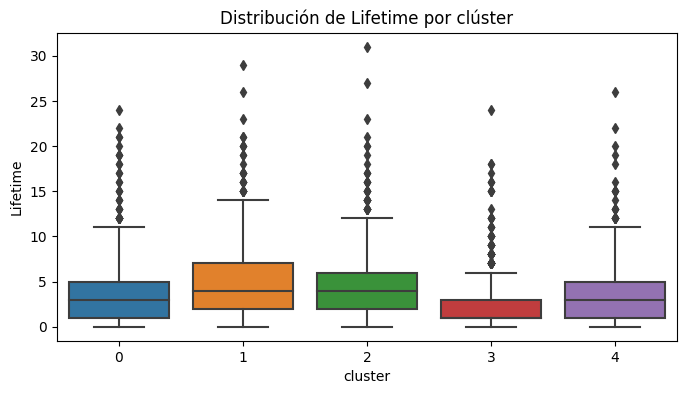

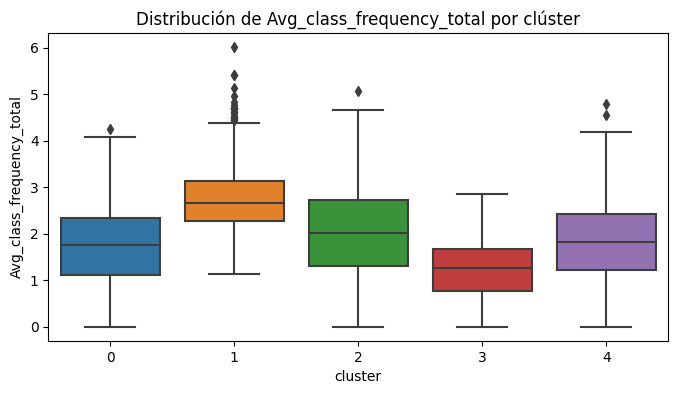

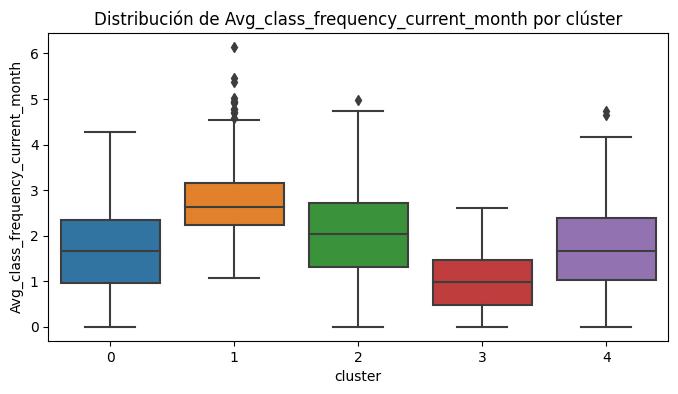

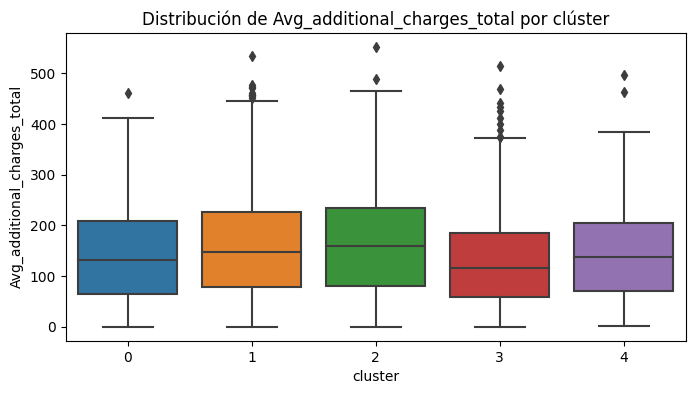

In [23]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="cluster", y=feature, data=df)
    plt.title(f"Distribución de {feature} por clúster")
    plt.show()


**conclusion**
Grandes diferencias en la tasa de cancelación

Cluster 2 (contratos largos, alta antigüedad): 2.2% de churn

Cluster 1 (muy alta frecuencia de visitas): 9.0% de churn

Cluster 0 (casi todos entraron por “promo amigos”, con contrato medio): 24.6% de churn

Cluster 4 (datos completos salvo que no facilitaron teléfono): 26.7% de churn

Cluster 3 (contratos muy cortos, baja antigüedad y frecuencia): 57.3% de churn

Variables que más distinguen a los clústeres

Contract_period y Lifetime: los más largos reducen drásticamente el churn.

Avg_class_frequency_current_month: la frecuencia semanal alta está asociada a lealtad.

Promo_friends y Phone: los que vinieron por amigos o dejaron teléfono tienden a quedarse más.

Grupos críticos

Cluster 3 (“en riesgo extremo”): contrato ~2 meses, antigüedad ~2 meses, frecuencia <1 clase/semana y poco gasto extra → >50% de churn.

Cluster 4 (“contacto limitado”): variables intermedias pero sin número de teléfono → churn ~27%.

Grupos leales

Cluster 2 (“VIP / largo plazo”): contratos ~12 meses, antigüedad ~4.7 meses, frecuencia ~2 clases/semana → churn casi nulo.

Cluster 1 (“frecuentadores intensivos”): alta frecuencia, aunque contrato medio (~2.6 meses) → churn bajo (~9%).

In [24]:
print("Tasa de cancelación por clúster:")
print(df.groupby("cluster")["Churn"].mean())

Tasa de cancelación por clúster:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


**Conclusiones de la tasa de cancelación por clúster:**

Máximo churn (~57 %) en el Cluster 3, caracterizado por contratos cortos (∼2 meses), antigüedad baja (∼2 meses), y frecuencia de visitas <1 clase/semana.

Churn intermedio en:

Cluster 4 (~27 %): clientes con datos de perfil completos salvo que no dejaron teléfono, antigüedad y frecuencia medias.

Cluster 0 (~25 %): muchos entraron por promoción “trae a un amigo” pero con contrato medio; muestran compromiso moderado.

Churn bajo en:

Cluster 1 (~9 %): alta frecuencia de visitas (∼3 clases/semana), contratos de duración media.

Cluster 2 (~2 %): contratos largos (∼12 meses), antigüedad alta, frecuencia establecida (∼2 clases/semana).



## conclusiones y recomendaciones 

**Conclusiones clave:**

Perfil de riesgo: Los clientes jóvenes, con poca antigüedad, contratos mensuales y baja frecuencia de visitas presentan la tasa de churn más alta (> 50 %).

Factores protectores: Contratos largos (6–12 meses), alta frecuencia semanal y gasto en servicios adicionales reducen drásticamente la probabilidad de cancelación (< 5 %).

Importancia del contacto: Aquellos sin canal de comunicación directo (teléfono, email) registran churn intermedio (~25 %).

Valor de la promoción: La promoción “trae a un amigo” atrae clientes, pero sin seguimiento post-oferta, ~25 % acaban cancelando.

**Principios esenciales y pasos de marketing:**

Segmentación y personalización

Acción: Identificar al “cluster de alto riesgo” (poca antigüedad y visitas) y enviarles una campaña de bienvenida con recomendaciones de clases según su perfil.

Ejemplo: Email/SMS en la 2.ª semana de inscripción con enlace a un video tutorial de introducción y oferta de coaching personalizado.

Incentivo a la fidelidad y extensiones de contrato

Acción: Ofrecer un descuento del 10 %–15 % para pasar de contrato mensual a trimestral o semestral.

Ejemplo: Popup en la app o mensaje en recepción al cumplir 4 visitas mensuales, invitando a “asegurar tu plaza” con tarifa reducida por 3 meses.

Comunicación omnicanal

Acción: Asegurar datos de contacto (teléfono y email) al inscribirse, y usar recordatorios automáticos antes de clases o vencimiento de contrato.

Ejemplo: Campaña de SMS 3 días antes de la expiración del contrato y notificación push con opción de renovación en un clic.

Fomento del engagement y up-sell de servicios

Acción: Recompensar la frecuencia de asistencia con puntos canjeables por masajes, café o productos.

Ejemplo: Programa de “Gym Points”: 1 punto por visita, y al alcanzar 20 puntos recibes un masaje de cortesía o un batido gratuito.

